# On mappe la france

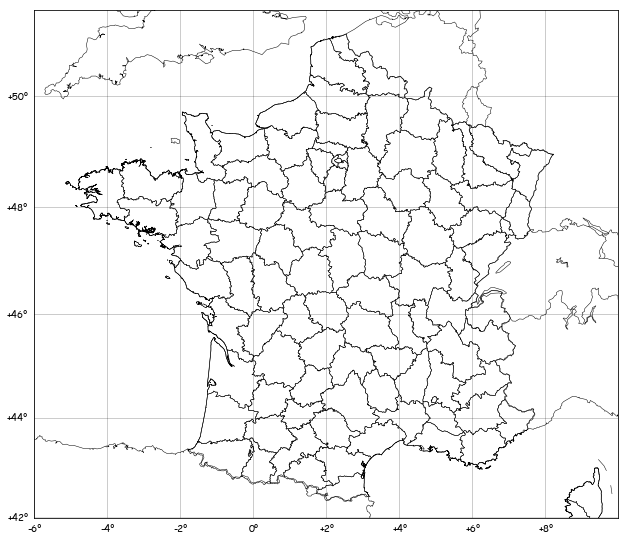

In [12]:
#
# BaseMap example by geophysique.be
# tutorial 07
 
import numpy as np
import matplotlib.pyplot as plt
import conda
import os

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib
from mpl_toolkits.basemap import Basemap

 
### PARAMETERS FOR MATPLOTLIB :
import matplotlib as mpl
mpl.rcParams['font.size'] = 10.
mpl.rcParams['font.family'] = 'Comic Sans MS'
mpl.rcParams['axes.labelsize'] = 8.
mpl.rcParams['xtick.labelsize'] = 6.
mpl.rcParams['ytick.labelsize'] = 6.
 
fig = plt.figure(figsize=(11.7,8.3))
#Custom adjust of the subplots
plt.subplots_adjust(left=0.05,right=0.95,top=0.90,bottom=0.05,wspace=0.15,hspace=0.05)
ax = plt.subplot(111)
#Let's create a basemap of Europe
x1 = -6.
x2 = 10.
y1 = 42.
y2 = 51.5
 
m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2)
m.drawcountries(linewidth=0.5)
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(y1,y2,2.),labels=[1,0,0,0],color='black',dashes=[1,0],labelstyle='+/-',linewidth=0.2) # draw parallels
m.drawmeridians(np.arange(x1,x2,2.),labels=[0,0,0,1],color='black',dashes=[1,0],labelstyle='+/-',linewidth=0.2) # draw meridians
m.readshapefile(name="France", shapefile="/Users/amarchand/Downloads/gadm36_FRA_shp/gadm36_FRA_2")
import shapefile
import dbfread
from matplotlib.collections import LineCollection
from matplotlib import cm
 
 
plt.savefig('tutorial07.png',dpi=300)
plt.show()

In [15]:
import asyncio
loop = asyncio.get_event_loop()
from predcrash_utils.commons import get_asset_root, get_file_content

cfg = loop.run_until_complete(get_asset_root())
directory = loop.run_until_complete(get_file_content(cfg, 'caracteristiques_2017'))

In [16]:
directory

'/Users/amarchand/ENSAE/Projet/predcrash/PredCrashData/caracteristiques_2017.csv'

In [17]:
import pandas as pd
df = pd.read_csv(directory, index_col='Num_Acc', encoding='latin1')

In [18]:
lat = df['lat'].values
lat = [i/100000 for i in lat]
lon = df['long'].values
lon = [i/100000 for i in lon]

/Users/amarchand/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4790: RuntimeWarning: invalid value encountered in greater
  lonsin = np.where(lonsin > lon_0+180, lonsin-360 ,lonsin)
/Users/amarchand/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4791: RuntimeWarning: invalid value encountered in less
  lonsin = np.where(lonsin < lon_0-180, lonsin+360 ,lonsin)
/Users/amarchand/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4797: RuntimeWarning: invalid value encountered in greater_equal
  itemindex = len(lonsin)-np.where(londiff>=thresh)[0]
/Users/amarchand/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4828: RuntimeWarning: invalid value encountered in less
  mask = np.logical_or(lonsin<lon_0-180,lonsin>lon_0+180)
/Users/amarchand/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4828: RuntimeWarning: invalid value encountered in greater
  mask = np.logical_or(lonsin<lo

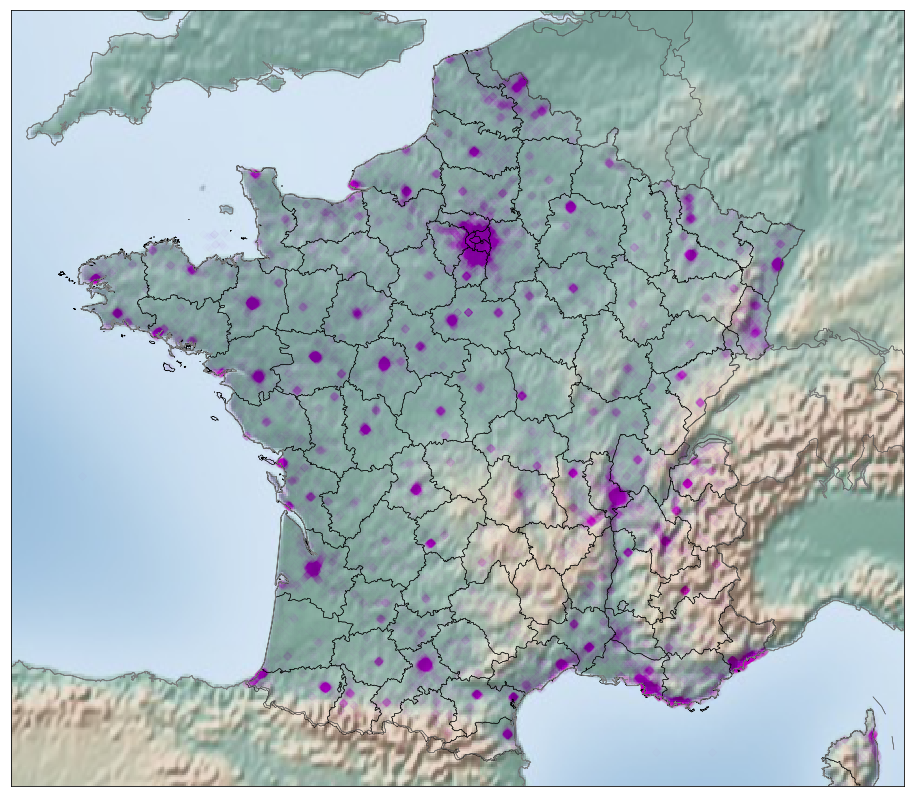

In [19]:
# 1. Draw the map background
fig = plt.figure(figsize=(16, 16))
m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2)
m.drawcountries(linewidth=0.5)
m.drawcoastlines(linewidth=0.5)
m.readshapefile(name="France", shapefile="/Users/amarchand/Downloads/gadm36_FRA_shp/gadm36_FRA_2")
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          marker='D',color='m', alpha=0.01)

# 3. create colorbar and legend

# make legend with dummy points

In [21]:
directory = loop.run_until_complete(get_file_content(cfg, 'caracteristiques_2017'))
df = pd.read_csv(directory, index_col='Num_Acc', encoding='latin1')
directory = loop.run_until_complete(get_file_content(cfg, 'lieux_2017'))
df2 = pd.read_csv(directory, index_col='Num_Acc', encoding='latin1')
directory = loop.run_until_complete(get_file_content(cfg, 'caracteristiques_2007'))
df3 = pd.read_csv(directory, index_col='Num_Acc', encoding='latin1')

/Users/amarchand/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [35]:
frames = [df,df2,df3]
df_total = pd.concat(frames)

/Users/amarchand/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


In [37]:
df.shape

(60701, 15)

In [38]:
df2.shape

(60701, 17)

In [39]:
df3.shape

(83850, 15)

In [43]:
df_total.loc[200700000001,'lat']

5051700.0

In [40]:
60701 + 83850

144551

In [44]:
df.head()

,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
Num_Acc,,,,,,,,,,,,,,,
201700000001,17,1,11,1820,5,2,1,1.0,1.0,477,rue nationale,M,5051326.0,292191.0,590
201700000002,17,2,13,1630,1,2,3,1.0,3.0,5,5 rue sonneville,M,5053611.0,295314.0,590
201700000003,17,3,7,1150,1,2,9,1.0,5.0,52,rue Jules Guesde,M,5052174.0,288786.0,590
201700000004,17,4,22,1300,1,2,1,1.0,6.0,5,46 rue Sonneville,M,5053723.0,295700.0,590
201700000005,17,5,20,1230,1,2,1,1.0,2.0,11,Rue roger salengro,M,5052999.0,293798.0,590


In [3]:
from predcrash_core.mapping_accidents.mapping import Map_france

df = loop.run_until_complete(Map_france.make_data(['caracteristiques', 'lieux'],['2005','2006','2007']))

/Users/amarchand/ENSAE/Projet/predcrash/predcrash_core/mapping_accidents/mapping.py:44: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  df_total = pd.concat(list_df, axis=0)


In [7]:
df['lat']

Num_Acc
200500000001    5051500.0
200500000002    5053700.0
200500000003    5054600.0
200500000004    5098700.0
200500000005    5096400.0
200500000006    5099500.0
200500000007          0.0
200500000008    5105200.0
200500000009    5097300.0
200500000010    5106500.0
200500000011          0.0
200500000012    5064700.0
200500000013    5081700.0
200500000014    5067800.0
200500000015    5061500.0
200500000016    5048800.0
200500000017    5015000.0
200500000018          0.0
200500000019    5012300.0
200500000020    5012300.0
200500000021    5007200.0
200500000022    5016500.0
200500000023          0.0
200500000024    5020100.0
200500000025    5011700.0
200500000026          0.0
200500000027          0.0
200500000028    5023800.0
200500000029          0.0
200500000030    5030000.0
                  ...    
200700084697          NaN
200700084698          NaN
200700084699          NaN
200700084700          NaN
200700084701          NaN
200700084702          NaN
200700084703          NaN
2007

In [53]:
directory = loop.run_until_complete(get_file_content(cfg, 'lieux_2009'))
df = pd.read_csv(directory, index_col='Num_Acc', encoding='latin1')

In [54]:
df

,catr,voie,v1,v2,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1
Num_Acc,,,,,,,,,,,,,,,,,
200900000001,3,125.0,NaN,NaN,2.0,2.0,7.0,0.0,0.0,1.0,1.0,0.0,52.0,1.0,0.0,1.0,0.0
200900000002,3,878.0,NaN,NaN,2.0,2.0,21.0,800.0,0.0,3.0,3.0,0.0,62.0,2.0,0.0,1.0,0.0
200900000003,3,4.0,NaN,NaN,2.0,3.0,22.0,524.0,0.0,1.0,1.0,47.0,72.0,2.0,0.0,1.0,0.0
200900000004,3,775.0,NaN,NaN,2.0,2.0,23.0,150.0,0.0,1.0,1.0,0.0,63.0,1.0,0.0,3.0,0.0
200900000005,3,41.0,NaN,NaN,2.0,2.0,13.0,500.0,0.0,1.0,1.0,0.0,40.0,1.0,0.0,1.0,0.0
200900000006,3,81.0,NaN,NaN,2.0,2.0,9.0,900.0,0.0,2.0,1.0,0.0,62.0,2.0,0.0,3.0,99.0
200900000007,3,35.0,NaN,NaN,2.0,0.0,30.0,0.0,0.0,2.0,2.0,0.0,0.0,7.0,0.0,1.0,0.0
200900000008,4,0.0,NaN,NaN,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
200900000009,3,723.0,NaN,NaN,3.0,2.0,44.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0
